Importing libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

Importing dataset

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
train = pd.read_csv('/content/Breast cancer prediction dataset.csv')
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
train.shape

(569, 33)

In [17]:
train.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


Handling missing values

In [18]:
#checking for missing values in each column
train.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [19]:
#handling missing value
train=train.drop('Unnamed: 32',axis=1)
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# drop the id columns
train=train.drop('id',axis=1)

In [21]:
# transformation of type of the target value to numerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train.diagnosis = le.fit_transform(train.diagnosis)
train.diagnosis

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [22]:
train['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


Splitting the data into training data and testing data

In [23]:
x=train.drop('diagnosis',axis=1)
y=train.diagnosis

In [24]:
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Model Training

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
x_train_prediction = classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)
x_test_prediction = classifier.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.989010989010989
Accuracy on test data: 0.9649122807017544


1.Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [30]:
# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
conf_matrix= confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)
print('Confusion Matrix for Logistic Regression:')
print(conf_matrix)
print('Accuracy of Logistic Regression:',acc_logreg)
mylist.append(acc_logreg)

Confusion Matrix for Logistic Regression:
[[65  2]
 [ 2 45]]
Accuracy of Logistic Regression: 0.9649122807017544


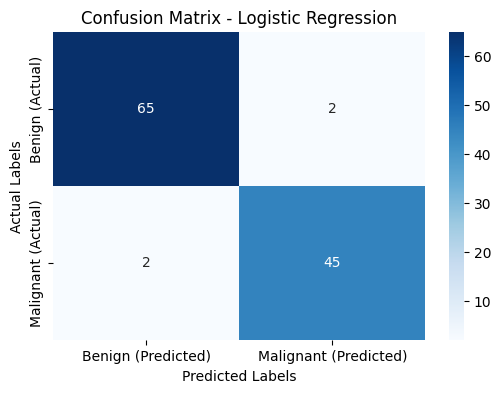

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your Logistic Regression model and have
# x_train, y_train, x_test, y_test, and your trained model (e.g., 'classifier')

# Predict on the test set
y_pred_logistic = classifier.predict(x_test)  # Use your trained model

# Calculate the confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logistic, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Benign (Predicted)', 'Malignant (Predicted)'],
            yticklabels=['Benign (Actual)', 'Malignant (Actual)'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

2.KNN(K-Nearest Neighbors) Algorithm

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(x_test)

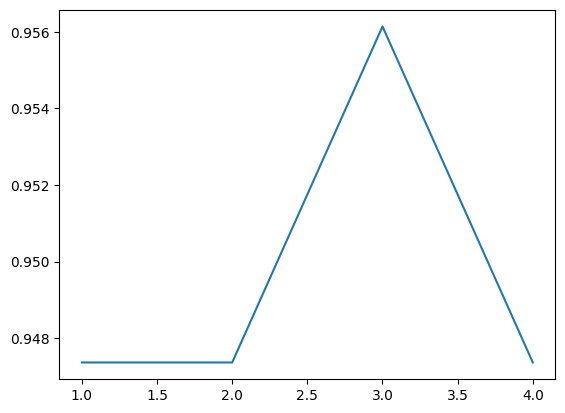

In [34]:
# Finding the optimum number of neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,5)), list1)
plt.show()

In [35]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
# accuracy score
acc_knn = accuracy_score(y_test, y_pred)
print('Confusion Matrix for kNearestClassifier:')
print(conf_matrix)
print('Accuracy of kNearestClassifier:',acc_knn)

Confusion Matrix for kNearestClassifier:
[[67  0]
 [ 6 41]]
Accuracy of kNearestClassifier: 0.9473684210526315


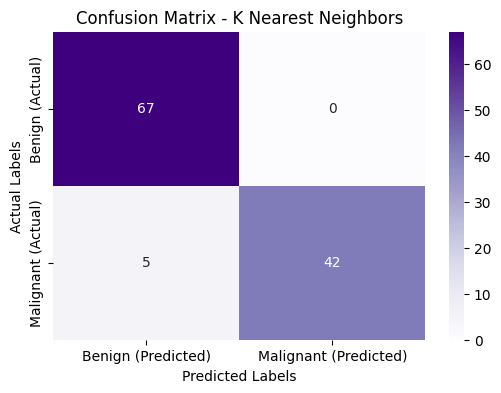

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Assuming x_train, y_train, x_test are defined from your previous code

# Instantiate and train the KNN model with the optimum number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # Use the optimum number of neighbors you found
knn.fit(x_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(x_test)

# Calculate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, cmap="Purples", fmt="d",
            xticklabels=['Benign (Predicted)', 'Malignant (Predicted)'],
            yticklabels=['Benign (Actual)', 'Malignant (Actual)'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - K Nearest Neighbors")
plt.show()

3.Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=42, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=42)

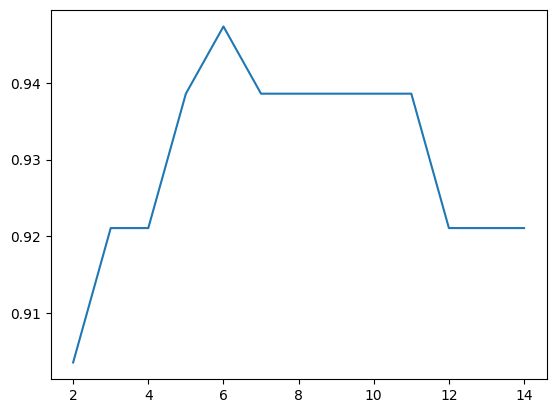

In [38]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

In [39]:
# Making the confusion matrix and calculating accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print("Confusion Matrix For Decision Tree:\n",conf_matrix)
print("Accuracy For Decision Tree:",acc_decisiontree)

Confusion Matrix For Decision Tree:
 [[62  5]
 [ 4 43]]
Accuracy For Decision Tree: 0.9210526315789473


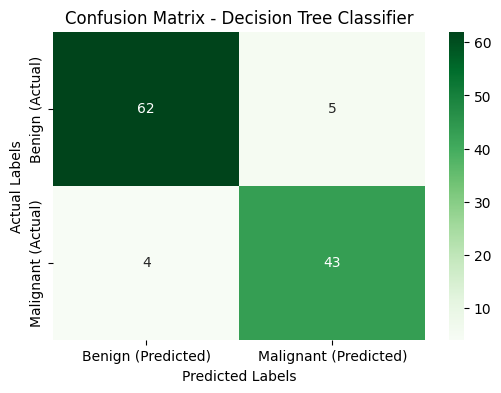

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your Decision Tree model and have
# x_train, y_train, x_test, y_test, and your trained model (e.g., 'classifier')

# Predict on the test set
y_pred_decision_tree = classifier.predict(x_test)  # Use your trained model

# Calculate the confusion matrix
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_decision_tree, annot=True, cmap="Greens", fmt="d",
            xticklabels=['Benign (Predicted)', 'Malignant (Predicted)'],
            yticklabels=['Benign (Actual)', 'Malignant (Actual)'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

In [41]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression',
              'Decision Tree'],
    'Score': [ acc_logreg, acc_knn, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,KNN,0.964912
1,Logistic Regression,0.947368
2,Decision Tree,0.921053


/tmp/ipython-input-3969786516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)


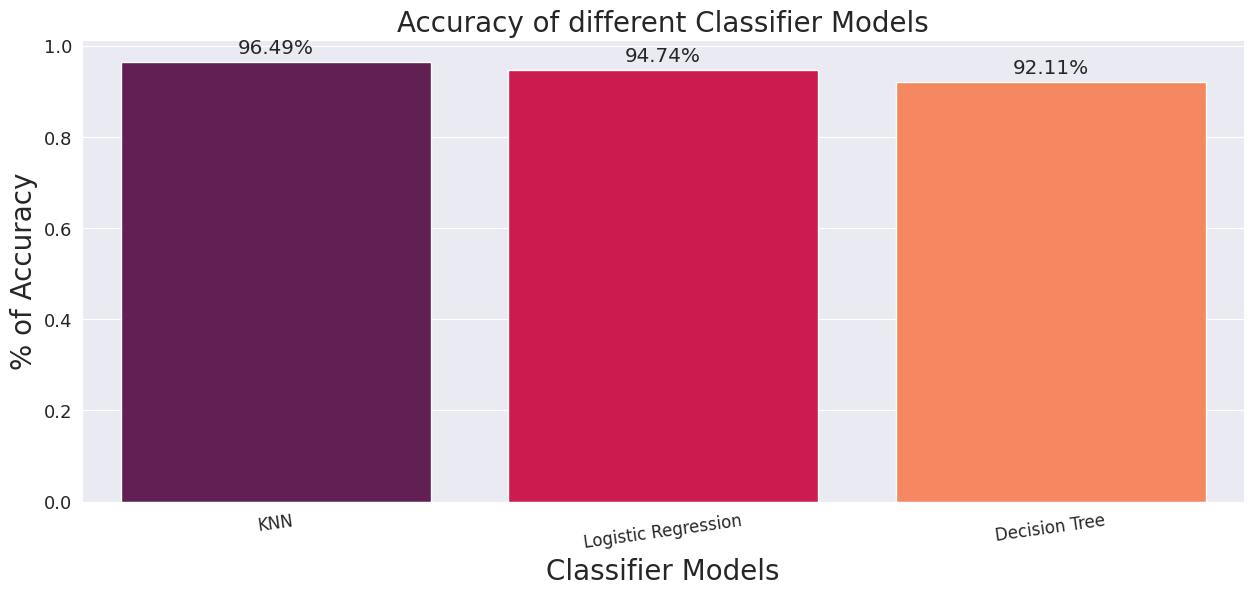

In [42]:
plt.rcParams['figure.figsize']=15,6
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

Building a predictive system

In [47]:
input_data=(7,1,0,0,5,9,13,0,0,2,0,4,2,3,2,4,6,7,0,2,3,4,0,4,1,0,0,0,7,9)


In [48]:
import numpy as np
import pandas as pd
# Assuming input_data is your input data
input_data_as_numpy_array= np.asarray(input_data)
# Reshaping input data to 2D array
input_data_reshape= input_data_as_numpy_array.reshape(1,-1)
# Create a DataFrame with reshaped input data and appropriate column names
column_names =train.drop('diagnosis', axis=1).columns
input_df=pd.DataFrame(input_data_reshape,columns=column_names)
# Assuming classifier is a pre-trained model
prediction = classifier.predict(input_data_reshape)
# Print prediction result
print(prediction)
# Interpretation of the prediction
if(prediction[0]==0):
  print('The tumor is benign')
else:
  print('The tumor is malignant')

[0]
The tumor is benign
